<a href="https://colab.research.google.com/github/guilhermelaviola/SoccerCompetitionsStudy/blob/main/CopaLibertadoresStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-4-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [6]:
# Importing the dataset:
conmebol_competitions = pd.ExcelFile('CONMEBOL Competitions finals.xlsx')
lib = pd.read_excel(conmebol_competitions, 'Copa Libertadores finals')

# Displaying the last 5 champions:
lib.tail()

,Season,Winners country,Winner,Score (1st game),Score (2nd game),Score (3rd game),Runner-up,Runners-up country,Venue (1st game),Host city (1st game),...,Venue (2nd game),Host city (2nd game),Host country (2nd game),Venue (3rd game),Host city (3rd game),Host country (3rd game),Attendance (1st game),Attendance (2nd game),Attendance (3rd game),How the game was won
59,2019,Brazil,Flamengo,2–1,NaN,NaN,River Plate,Argentina,Estadio Monumental,Lima,...,NaN,NaN,NaN,NaN,NaN,NaN,78573,0,0,Regular time
60,2020,Brazil,Palmeiras,1–0,NaN,NaN,Santos,Brazil,Maracanã,Rio de Janeiro,...,NaN,NaN,NaN,NaN,NaN,NaN,5000,0,0,Regular time
61,2021,Brazil,Palmeiras,2–1,NaN,NaN,Flamengo,Brazil,Estadio Centenario,Montevideo,...,NaN,NaN,NaN,NaN,NaN,NaN,55023,0,0,Extra time
62,2022,Brazil,Flamengo,1–0,NaN,NaN,Athletico Paranaense,Brazil,Estadio Monumental Banco Pichincha,Guayaquil,...,NaN,NaN,NaN,NaN,NaN,NaN,42517,0,0,Regular time
63,2023,Brazil,Fluminense,2–1,NaN,NaN,Boca Juniors,Argentina,Maracanã,Rio de Janeiro,...,NaN,NaN,NaN,NaN,NaN,NaN,69232,0,0,Extra time


In [7]:
# Displaying the number of rows and columns in the dataset:
lib.shape

(64, 21)

In [8]:
# Displaying the datatypes presented in the columns:
lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Season                   64 non-null     int64 
 1   Winners country          64 non-null     object
 2   Winner                   64 non-null     object
 3   Score (1st game)         64 non-null     object
 4   Score (2nd game)         59 non-null     object
 5   Score (3rd game)         14 non-null     object
 6   Runner-up                64 non-null     object
 7   Runners-up country       64 non-null     object
 8   Venue (1st game)         64 non-null     object
 9   Host city (1st game)     64 non-null     object
 10  Host country (1st game)  64 non-null     object
 11  Venue (2nd game)         59 non-null     object
 12  Host city (2nd game)     59 non-null     object
 13  Host country (2nd game)  59 non-null     object
 14  Venue (3rd game)         14 non-null     obj

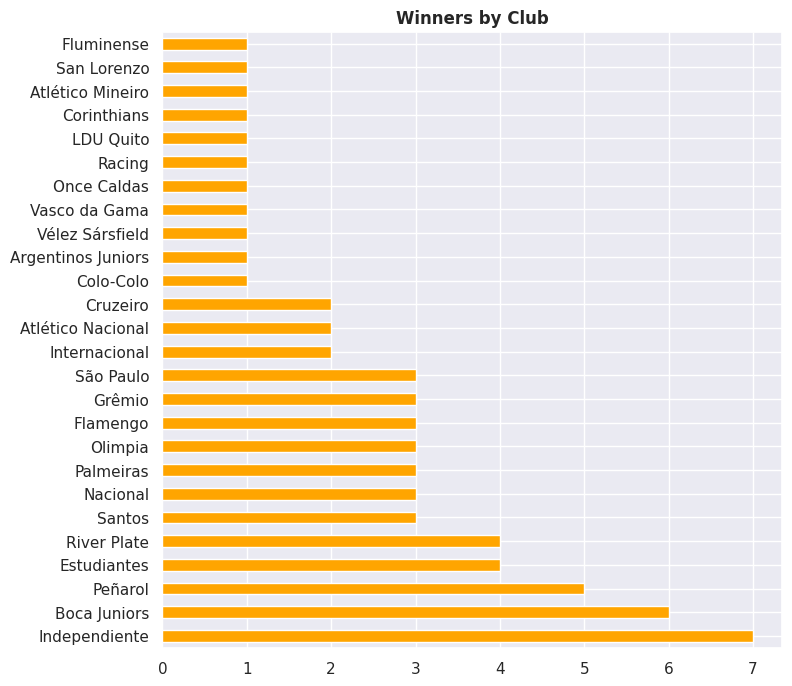

In [14]:
# Displaying number of titles by club:
lib.groupby('Season').first()['Winner'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 8))
plt.ylabel(None)
plt.title('Winners by Club', fontweight = 'bold')
plt.show()

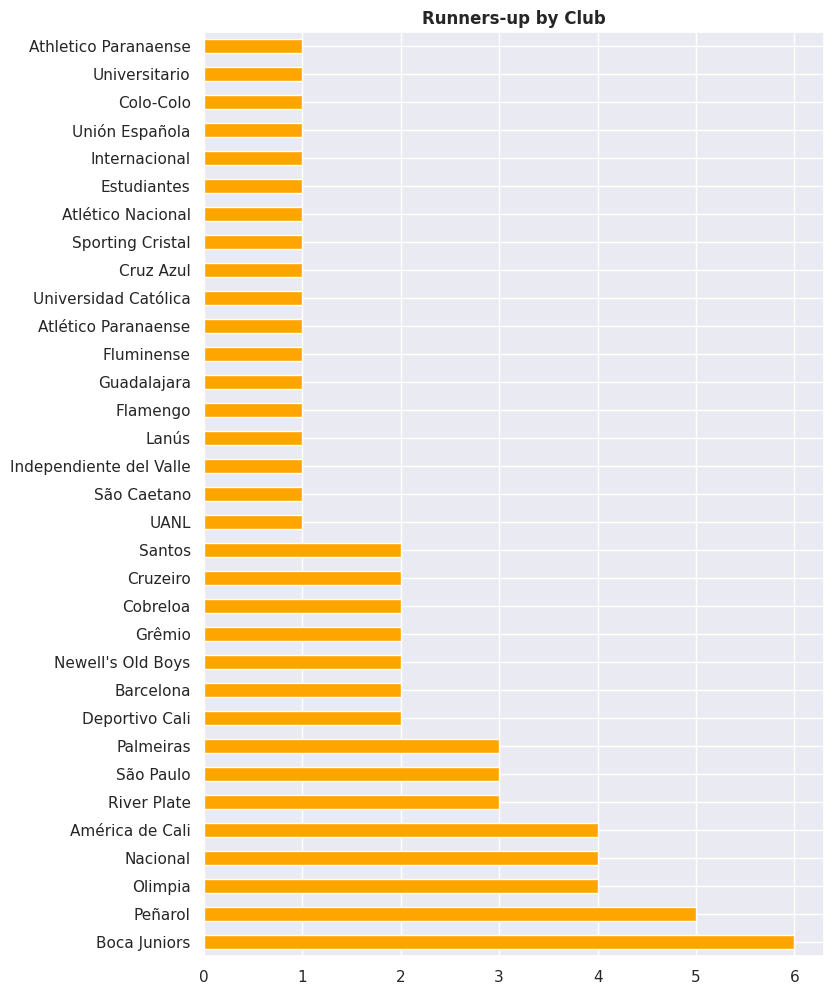

In [16]:
# Displaying number of runners-up by club:
lib.groupby('Season').first()['Runner-up'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 12))
plt.ylabel(None)
plt.title('Runners-up by Club', fontweight = 'bold')
plt.show()

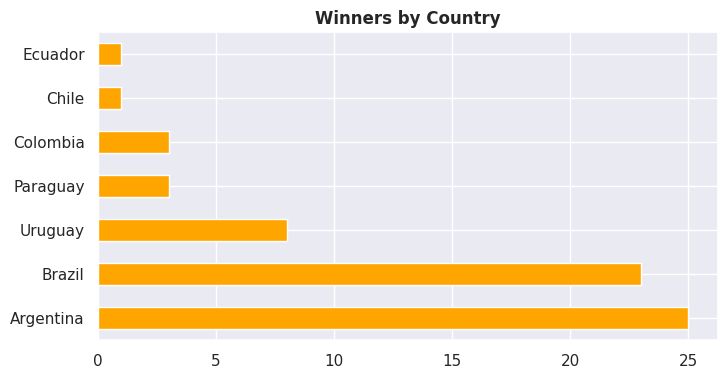

In [19]:
# Displaying number of titles by country:
lib.groupby('Season').first()['Winners country'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 4))
plt.ylabel(None)
plt.title('Winners by Country', fontweight = 'bold')
plt.show()

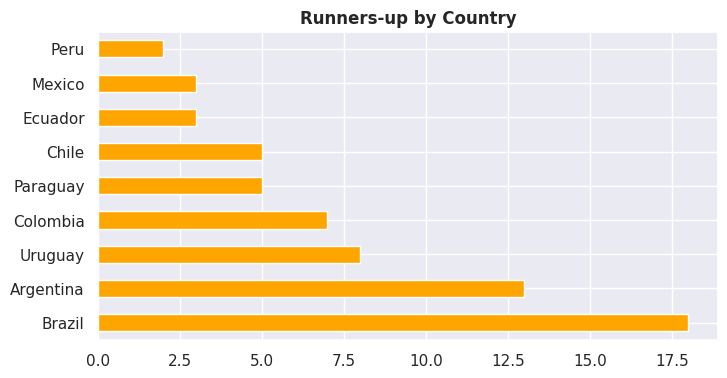

In [22]:
# Displaying number of runners-up by country:
lib.groupby('Season').first()['Runners-up country'].value_counts().plot(kind = 'barh', color = 'orange', figsize = (8, 4))
plt.ylabel(None)
plt.title('Runners-up by Country', fontweight = 'bold')
plt.show()

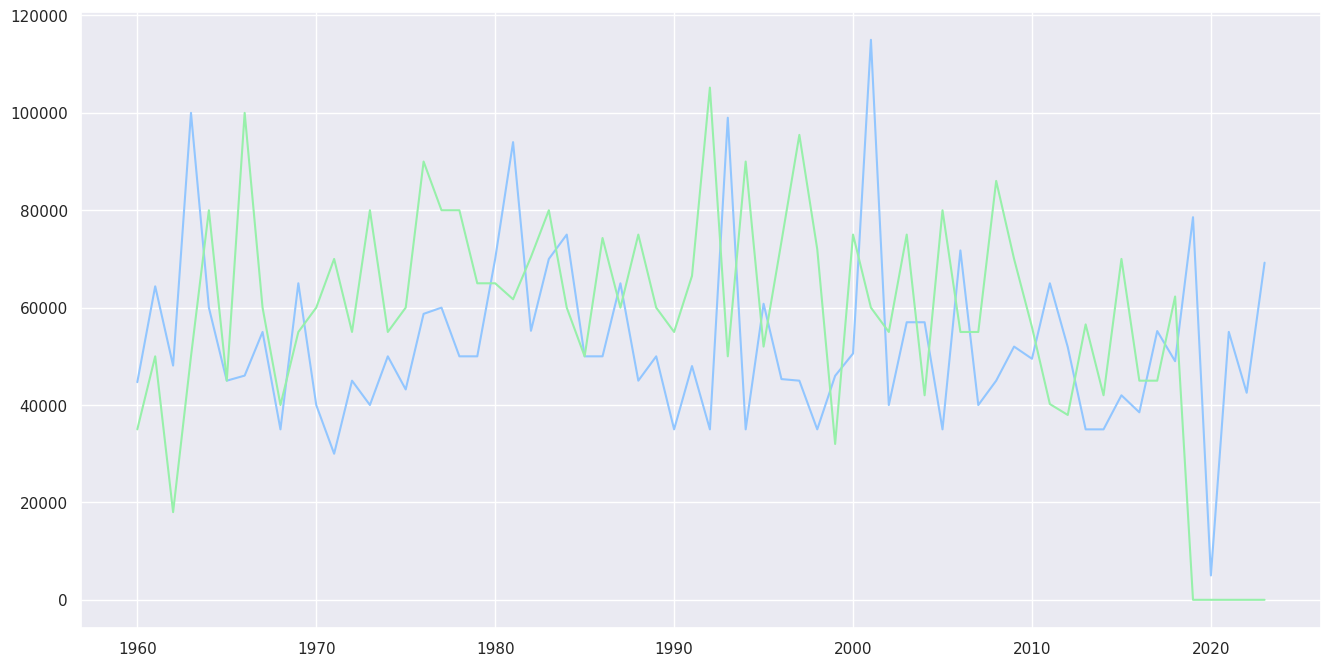

In [23]:
# Displaying the attendances of the 1st and 2nd leg matches by season:
plt.figure(figsize = (16,8))
plt.plot(lib['Season'], lib['Attendance (1st game)'])
plt.plot(lib['Season'], lib['Attendance (2nd game)'])

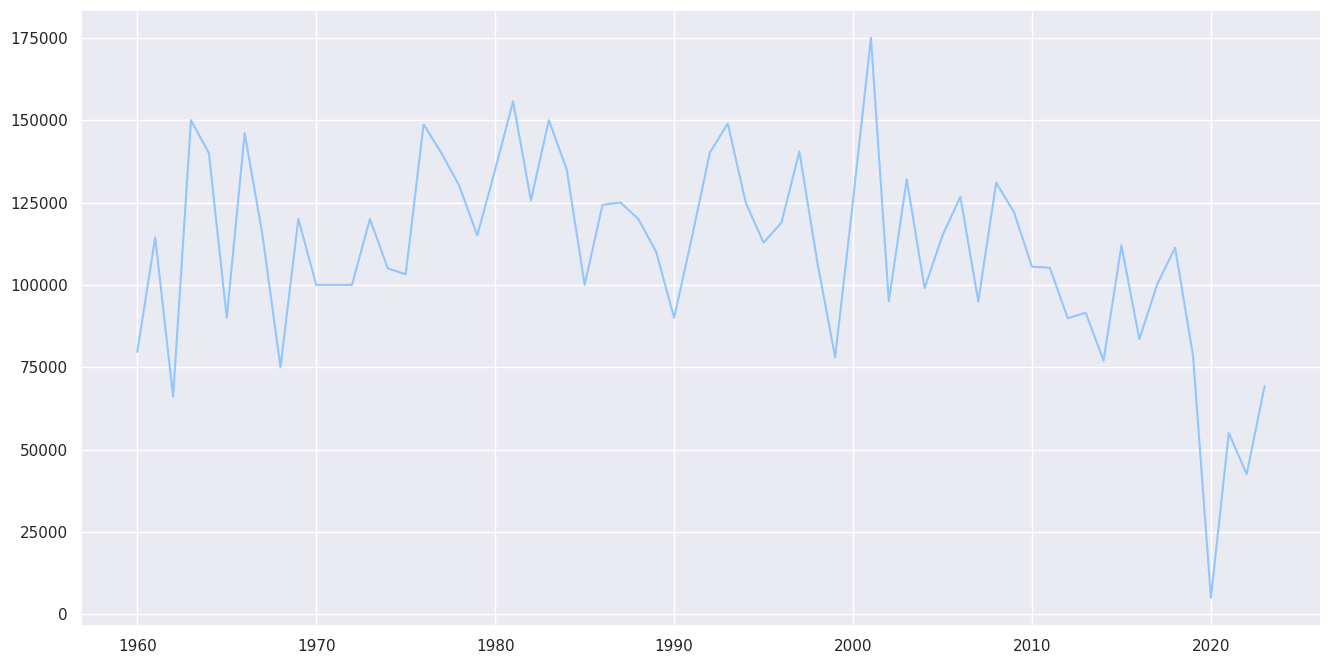

In [24]:
# Displaying the total attendances (1st and 2nd leg matches) by season:
plt.figure(figsize = (16,8))
plt.plot(lib['Season'], lib['Attendance (1st game)'] + lib['Attendance (2nd game)'])

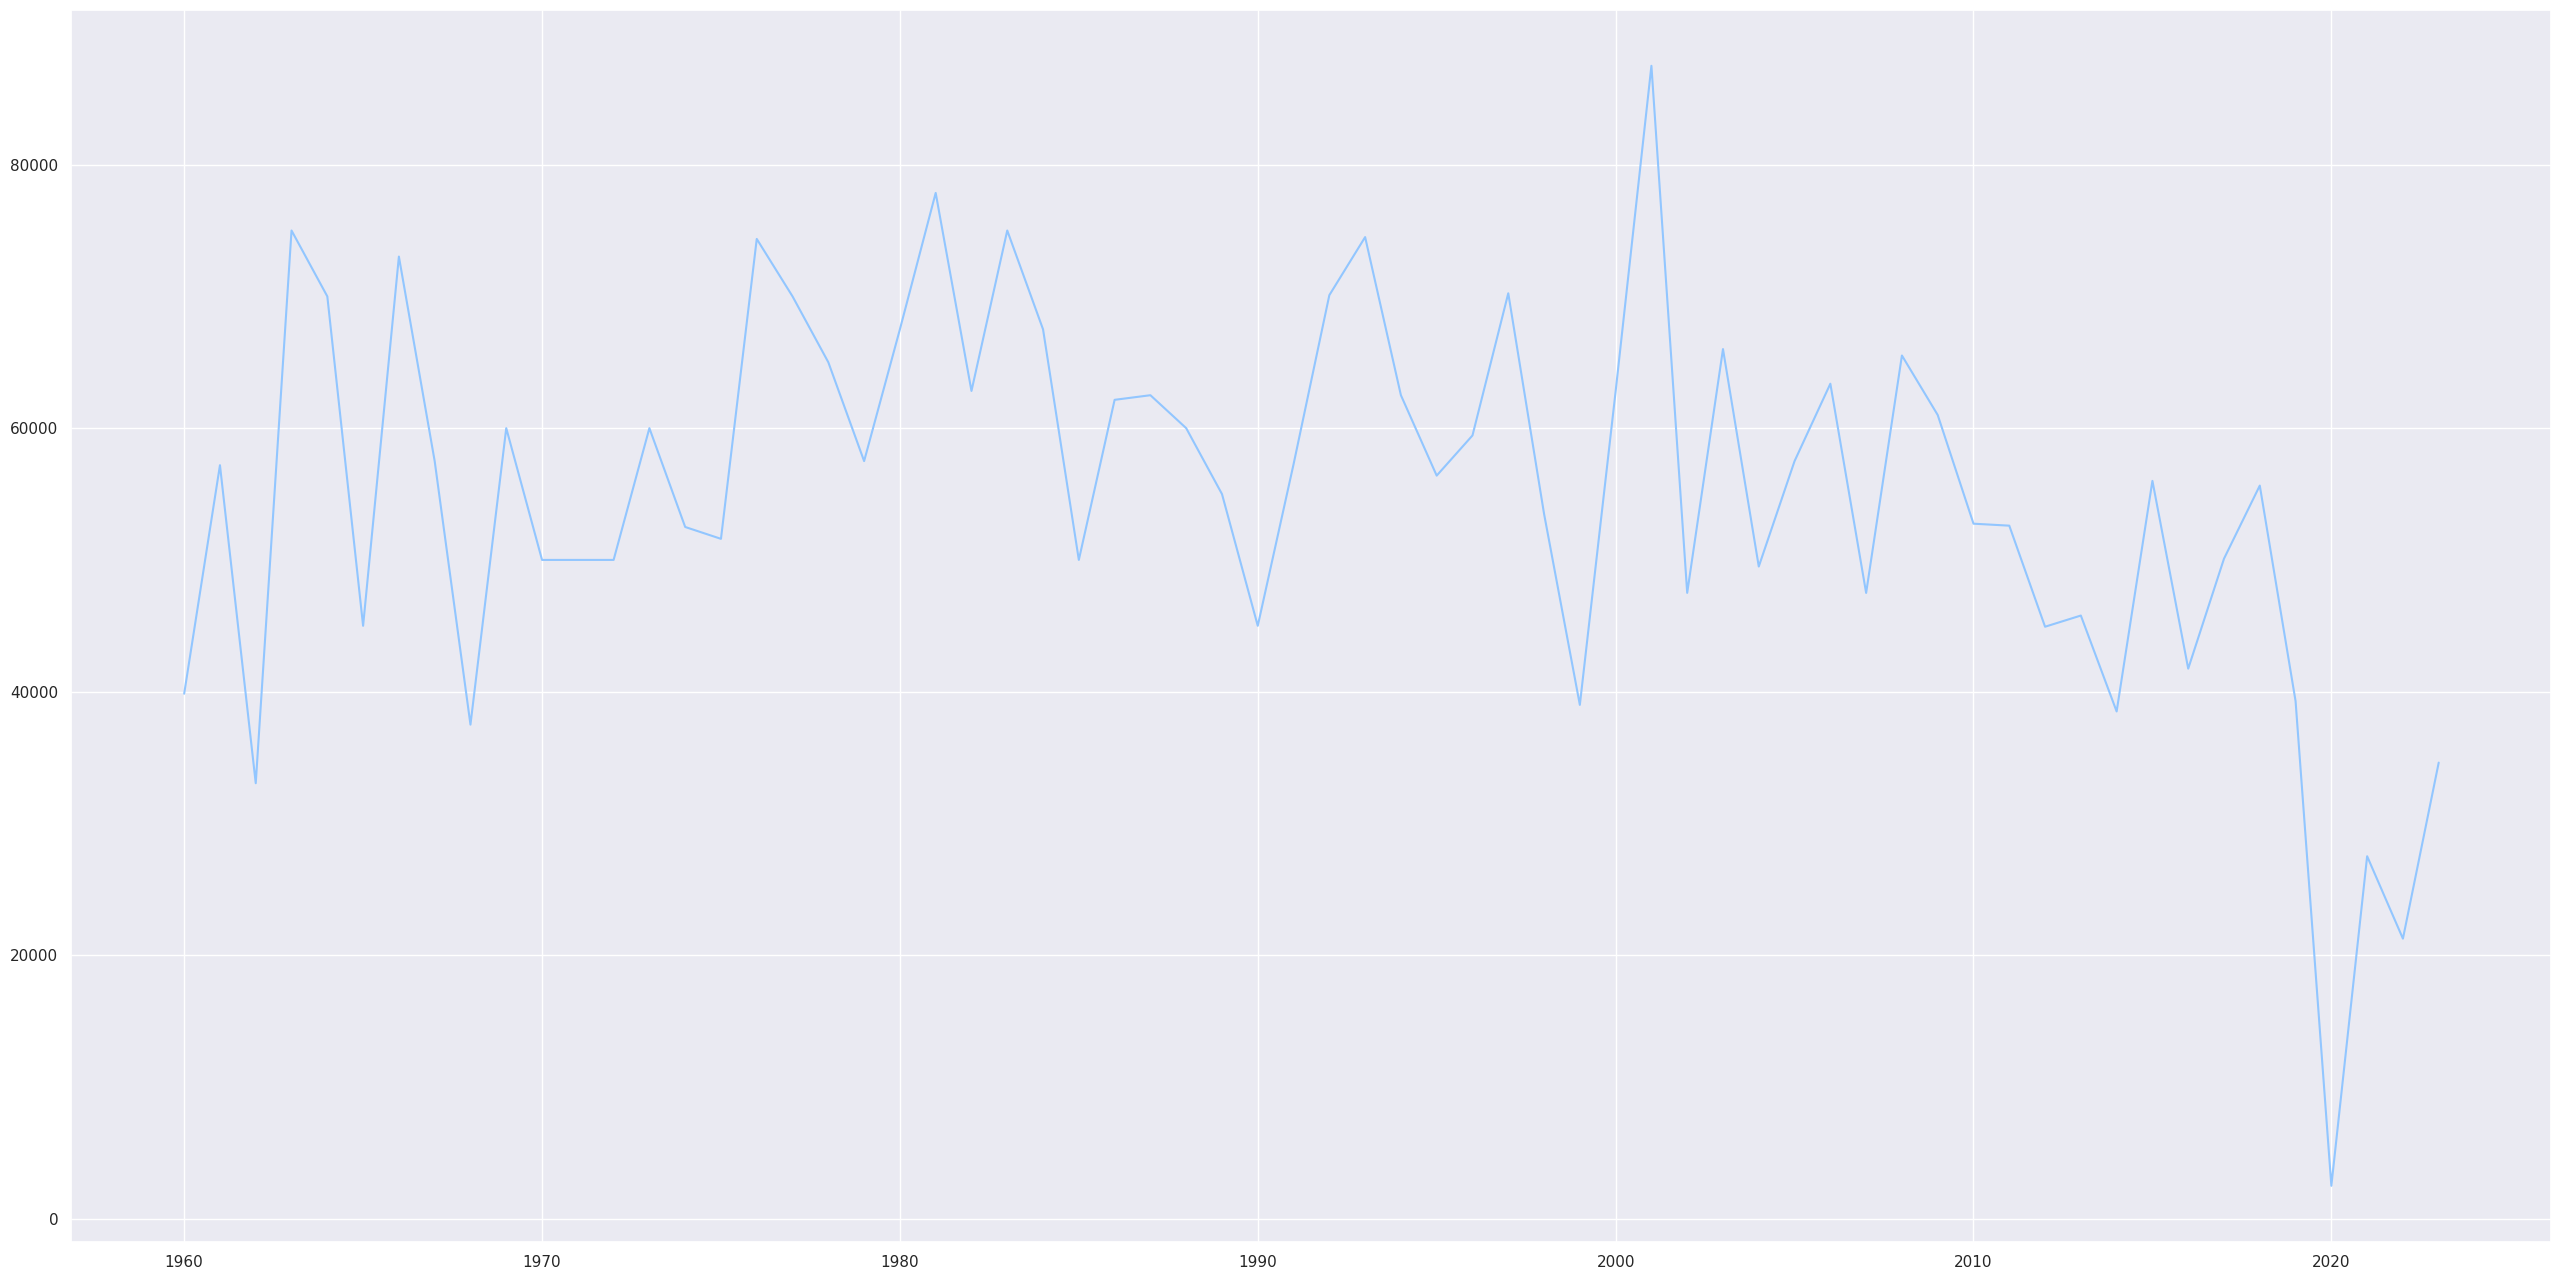

In [25]:
# Displaying the average attendances (1st and 2nd leg matches) by season:
plt.figure(figsize = (32,16))
plt.plot(lib['Season'], (lib['Attendance (1st game)'] + lib['Attendance (2nd game)']) / 2)